In [75]:
## First, read in and segement images one at a time

In [76]:
import pandas as pd
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import pylab as plt
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn import tree
import matplotlib.image as mpimg
import cv2
from scipy import ndimage as ndi
from skimage.color import rgb2gray
from skimage import measure
from skimage import transform
import math
from scipy import ndimage
from skimage import feature
from skimage import filters
from sklearn.metrics import confusion_matrix
import xlsxwriter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from skimage import morphology
import pickle
from scipy.stats import entropy as scipy_entropy
np.set_printoptions(threshold=np.nan)

In [77]:
#1st data set
imageNum = [3,16,22,24,25,38,42,44,50,92,103,118,125,132,134,144,146,147,150,152,156,161,\
            162,175,177,182,17,20,39,41,105,107,133,142,143,173,176,196,197,203,204,206,207,\
            208,364,365,367,371,374,375,378,379,380,381,383,384,385,389,390,392,394,395,397,399,400,402,2,4,15,\
           19,21,27,30,33,37,40,43,47,48,49,75,78,120,126,137,138,139,140,149,153,157,164,166,171,\
           210,155,376,6,8,14,18,36,170,226,243,254,256,278,279,280,304,306,312,328,331,\
           339,356,360,368,369,370,382,386,388,396,398,427,430,431,432,433,434,436,437,\
           88,91,168,211,242,285,405,407,417,406,424,425,429,]

#2nd data set
imageNum = [11428,11436,11481,11490,11491,11493,11494,11497,11504,11505,11507,11510,11520,11557,11613,11649,11684,\
           11729,11797,11892,11904,11943,11949,11957,11958,11996,12063,12081,14919,14946,15041,15079,15127,15136,\
           15193,15219]

#benign
imageNum = [24308,24311,24317,24319,24326,24327,24335,24339,24341,24347,24349,24350,24352,24353,24355,24366,24393,\
            24398,24401,24405,24406,24407,24413,24423,24434,24437,24441,24444,24447,24479,24497,24500,24501,24502,\
            24503,24506,24507,24524,24526,24540,24561,24568,24576,24577,24580,24591,24594,24596,24598,24603,24605,\
            24607,24610,24615,24625,24638,24645,24653,24668,24671,24678,24689,24704,24715,24718,24725,24730,24734]
imageNum = [24796,24803,24808,24815,24824,24826,24834,24837,24842,24847,24854,24855,24866,24884,24887,24888,24892,\
            24895,24899,24901,24902,24912,24916,24920,24924,24928,24941,24942,24959,24977,24985,24986,24991,24996,\
            25007,25026,25034,25039,25042,25044,25055,25057,25074,25077,25094,25096,25104,25108,25114,25118,25122,\
            25126,25137,25141,25146,25158,25161,25168,29771,29775,29788,29790,29803,29804,29809,29816,29821,24734]
imageNum = [29834,29842,29853,29858,29861,29862,29863,29939,29942,29959,29963,29966,29968,29969,29975,29979,29984,\
            29990,29993,29996,29997,29998,30012,30116,30135,30136,30140,30156,30161,30162,30166,30184,30194,30198,\
            30199,30209,30214,30215,30222,30232,30251,30252,30253,30256,30279,30284,30290,30292,30294,30295,30299,\
            30305,30311,30325,30328,30334,30336,30338,30351,30354,30355,30361,30367,30370,30371,30384,30407,]
imageNum = [30411,30412,30418,30419,30434,30437,30447,30450,30456,30462,30464,30467,30468,30469,30473,30477,\
            33726,33743,33763,33774,33775,33786,33815,33823,33826,33832,33835,33836,33837,33838,33864,33875,\
            33887,33890,33897,33903,33912,33914,33919,33921,33927,33929,33930,33932,33933,33935,33937,33939,\
            33948,33966,33982,33984,33989,33993,33997,34038,34041,34063,34067,34080,34084,34109,34112,34122]
imageNum = [34122,34128,34129,34138,34154,34171,34178,34181,34193,34198,34200,34207,34210,34213,34215,34225,34227,\
            34230,34232,34244,34251,34267,34293,34295,34297,34298,34308,34312,34314,34319]
#malignant
#mg use
imageNum = [13,22,29,54,70,78,]
imageNum = [139,141,142,143,145,148,150,151,152,156,163,165,172,175,297,314,420,466,482,518,550]
imageNum = [1100,1102,1103,1105,1106,1118,1119,1128,1135,1140,9882,9894,9905,9950,9993]
imageNum = [10016,10034,10080,10089,10094,10140,10145,10171,10283,10350,10358,10360,10364,10397,10533,10587,10597,\
            10777,10810,10852,10860,10995,11125,11135,11137,11163,11169,11176,11269,11428,11436,11481,11490,11491,\
            11493,11498,11513,11521,11528,11617,11626,11645,24313,24315,24333,24351,24410,24481,24496,24516,24640,24688,\
            24729,24732,24792,24805,24806,24823,24864,24865,24898,24918,24930,24932,24952,25035,25085,25153,25219,]
imageNum = [25235,25238,25313,25316,25324,25413,25450,25489,25546,25589,25603,25611,25663,25708,25724,25748,25751,25755,\
            25766,25783,25835,25891,25955,25987,26081,26089,26113,26120,26131,26207,26239,26258,26352,26360,26369,26438,\
            26475,26506,26516,26545,26586,26664,26694,26746,26802,26897,26909,26993,26996,27043,27060,27063,27089,\
            27144,27171,27238,27260,27277,27302,27327,27350,27387,27420,27552,27604,27620,27622,27742,27793,27964,]
imageNum = [27964,28003,28017,28029,28127,28198,28326,28410,28412,28415,28445,28467,28489,28520,28543,28579,28642,28696,\
            28718,28760,28777,28898,28899,29000,29013,29028,29033,29056,29092, 29157,29272,29480,29495,29538,29571,\
            29606,29740,29839,29859,29933,30002,30032,30047,30107,30122,30129,30165,30238,30246,30255,30333,30356,\
            30391,30440,30512,30521,30575,30623,30653,30681,30695,30747,30760,30795,30818,30824,30828,30843,30898,\
            31025,31034,31146,31177,31208,31417,31494,31498,31529,31545,31550,31598,31642,31711,31741,31784,31821,\
            31908,31941,31953,31977,31999,32044,32095,32204,32232,32265,32313,32372,32400,32424,32447,32466,32526,\
            32552,32559,32598,32622,32630,32637]
imageNum = [32684,32695,32709,32716,32723,32724,32750,32751,32766,32774,32797,\
            32806,32836,32841,32844,32845,32847,32856,32875,32887,32917,32925,32927,32936,32938,32955,32965,32970,\
            32976,32981,32985,33034,33047,33051,33061,33081,33099,33103,33114,33117,33122,33141,33154,33166,33171,\
            33178,33186,33192,33193,33196,33204,33206,33209,33216,33226,33232,33241,33261,33268,33274,33279,33300,\
            33302,33304,33320,33333,33337,33369,33377,33387,33392,33394,33416,33429,33452,33470,33476,33520,33545,\
            33546,33560,33562,33586,33593,33612,33616,33619,33644,33651,33653,33654,33655,33662,33687,33730,33754,\
            33802,33804,33805,33807,33812,33831,33885,33901,33902,33938,33946,33956,33957,33967,33968,33980,33985,\
            34000,34049,34050,34051,34052,34061,34085,34094,34101,34104,34106,34107,34118,34120,34141,34159,34172,\
            34183,34202,34211,34218,34233,34236,34242,34246,34262,34269,34284,34287,34289,34316,34317] 


ISIC_0032684.jpg


C:\Users\Lingting\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Lingting\Anaconda3\lib\site-packages\skimage\morphology\misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


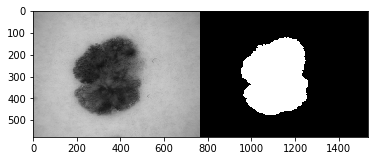

Do you want to keep this dataend


In [78]:
######################################
#Automate the image processing process
#######################################
a = 0
feature = np.zeros((200,19))
for b in imageNum:
    
    ##Load images
    #string = 'IMD'
    string = 'ISIC_00'
    #if len(str(b)) == 1:   
        #string +=str(0)
        #string +=str(0)
        #string +=str(b)
        #string +='.bmp'  
        #print(string)
    #elif len(str(b)) == 2: 
        #string +=str(0)
        #string +=str(b)
        #string +='.bmp'
        #print(string)
    #else : 
        #string +=str(b)
        #string +='.bmp'
        #print(string)
    string +=str(b)
    string +='.jpg' 
    print(string)
    
    ##Image Analysis
    img=mpimg.imread(string)
    img= transform.resize(img, (576,767))
    gray = rgb2gray(img)
    #plt.imshow(gray,cmap = "gray")
    #plt.title('Gray Scale Image')
    # Plot the histogram of intensity
    Newgray = gray*255
    #plt.hist(Newgray.ravel(),256,[0,256])
    #plt.show()
    # Otsu thresholding
    bw1 = filters.threshold_otsu(gray)
    bw1 = gray <= bw1
    #plt.imshow(res,cmap = "gray")
    # Apply to open to disconnect from hairs and stuff
    bw1 = np.uint8(bw1)
    kernel = np.ones((5,5),np.uint8)
    bw2 = morphology.binary_opening(bw1,kernel)
    #plt.imshow(bw2,cmap = 'gray')
    # Get rid of small objects
    #bw2 = np.uint8(bw2)
    bw3 = morphology.remove_small_objects(bw2,1000)
    #plt.imshow(bw3,cmap= 'gray')
    #Fill the hole inside the mole
    bw4 = ndi.binary_fill_holes(bw3)
    bw4= np.uint8(bw4)
    #plt.imshow(bw4,cmap = 'gray')
    # Invert the image to get the mole
    bw5 = np.ones((bw4.shape),dtype = int) - bw4
    #plt.imshow(bw5,cmap = 'gray')
    # Fill the obejctive to get the mole
    bw6 = ndi.binary_fill_holes(bw5,structure=np.ones((8,8)))
    #plt.imshow(bw6,cmap= 'gray')
    bw6 = np.uint8(bw6)
    # Dot product to get the mole
    bw7 = np.multiply(bw6,bw4)
    #plt.imshow(bw7,cmap = 'gray')
    # To get rid of small object once again
    bw8 = np.uint8(bw7)
    #bw8 = morphology.remove_small_objects(bw7,2000)
    
    ##Feature extraction
    area = [r.area for r in measure.regionprops(bw8)]
    feature[a,0] = area[0]
    eccentricity = [r.eccentricity for r in measure.regionprops(bw8)]
    feature[a,1] = eccentricity[0]
    perimeter = [r.perimeter for r in measure.regionprops(bw8)]
    feature[a,2] = perimeter[0]
    circularity = (4*math.pi*area[0])/(np.round(perimeter)**2)
    feature[a,3] =circularity[0]
    inertia_tensor = [r.inertia_tensor for r in measure.regionprops(bw8)]
    pa = inertia_tensor[0]
    feature[a,4] = pa[0,0]
    feature[a,5] = pa[0,1]
    feature[a,6] = pa[1,0]
    feature[a,7] = pa[1,1]
    inertia_tensor_eigvals = [r.inertia_tensor_eigvals for r in measure.regionprops(bw8)]
    inertia_tensor_eigvals = inertia_tensor_eigvals[0]
    feature[a,8] = inertia_tensor_eigvals[0]
    feature[a,9] = inertia_tensor_eigvals[1]
    max_intensity = [r.max_intensity for r in measure.regionprops(bw8,Newgray)]
    feature[a,10] =max_intensity[0]
    mean_intensity = [r.mean_intensity for r in measure.regionprops(bw8,Newgray)]
    feature[a,11] =mean_intensity[0]
    min_intensity = [r.min_intensity for r in measure.regionprops(bw8,Newgray)]
    feature[a,12] =min_intensity[0]
    orientation = [r.orientation for r in measure.regionprops(bw8,Newgray)]
    feature[a,13] =orientation[0]
    entropy = scipy_entropy(bw8.ravel(),base = 2)
    feature[a,14] = entropy
    variance = ndimage.variance(Newgray,bw8)
    feature[a,15] = variance
    feature[a,16] = np.mean(Newgray)
    feature[a,17] = np.std(Newgray)
    
    #Plot the figure
    plt.figure
    bw8 = bw8*255
    res = np.hstack((Newgray,bw8)) #stacking images side-by-side
    plt.imshow(res,cmap = "gray")
    plt.show()
    plt.close()
    
    ##Ask for user input
    YorN = input("Do you want to keep this data")
    if YorN == 'y':
        feature[a,18] = b# Image number
        a +=1
    elif YorN == 'end':
        break
    else:
        feature[a,18] = b# Image number
        a =a    
        
    

In [79]:
# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook('SkinMelanoma2.xlsx')
worksheet = workbook.add_worksheet()
rows,cols= feature.shape
        
for row in range(rows):
    for col in range(cols):
        worksheet.write(row+1, col, feature[row][col])


In [149]:
# Load in the data
df = pd.read_csv('data.csv')
df.head()

,area,ecce,peri,circ,it1,it2,it3,it4,ite1,ite2,max,mean,min,orie,entropy,variance,pmean,pstd,image,y
0,46012,0.481003,1618.838708,0.220591,3419.785360,360.546218,360.546218,4086.230829,4243.957141,3262.059048,208.3500,103.851162,23.9933,1.158415,15.489723,305.886674,156.397093,46.289270,3,0
1,73631,0.601542,1469.033621,0.428773,7383.216195,470.606138,470.606138,4850.177314,7467.822815,4765.570694,209.5283,104.792884,19.7270,0.177882,16.168026,372.250208,172.037117,47.104744,16,0
2,82705,0.516284,2338.680374,0.189968,7074.484248,1003.429068,1003.429068,6500.333523,7831.095696,5743.722075,209.9631,99.713836,32.5752,0.646073,16.335687,214.232244,142.241990,37.396493,22,0
3,26298,0.828246,1130.783838,0.258349,2596.621136,-1303.822029,-1303.822029,2410.944787,3810.906066,1196.659858,161.3497,103.830543,36.1946,-0.749856,14.682665,527.075711,178.423934,41.245518,24,0
4,57158,0.749017,1724.933116,0.241384,3527.092463,1238.133986,1238.133986,6604.801085,7041.053950,3090.839598,159.2609,84.183379,49.9801,1.232032,15.802668,134.666985,127.891740,33.327231,25,0


In [150]:
#Split the data
y = df['y']
X =df[['area','ecce','peri','circ','it1','it2','it3','it4','ite1','ite2','max','mean','min','orie','entropy','variance','pmean','pstd']]
Mean = np.mean(X,axis = 0)
Std = np.std(X,axis = 0)
X_standardized = preprocessing.scale(df[['area','ecce','peri','circ','it1','it2','it3','it4','ite1','ite2','max','mean','min','orie','entropy','variance','pmean','pstd']])
X_standardized.std(axis=0)
Newdf = pd.DataFrame(data = X_standardized)
Newdf.columns = ['area','ecce','peri','circ','it1','it2','it3','it4','ite1','ite2','max','mean','min','orie','entropy','variance','pmean','pstd']
X = Newdf[['area','ecce','peri','circ','it1','it2','it3','it4','ite1','ite2','max','mean','min','orie','entropy','variance','pmean','pstd']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


X.head()

,area,ecce,peri,circ,it1,it2,it3,it4,ite1,ite2,max,mean,min,orie,entropy,variance,pmean,pstd
0,-0.561608,-1.198981,0.055177,-1.120500,-0.712234,0.206518,0.206518,-0.392775,-0.751733,-0.356903,1.272726,0.975439,-0.089859,1.496734,-0.336590,-0.929753,-0.068091,0.718589
1,0.106264,-0.368539,-0.148019,0.283489,0.063106,0.276645,0.276645,-0.162790,-0.146061,0.211408,1.304803,1.015844,-0.371306,0.239277,0.389462,-0.651371,0.688672,0.788472
2,0.325689,-0.955914,1.031573,-1.327019,0.002710,0.616142,0.616142,0.333988,-0.077812,0.581139,1.316640,0.797928,0.476287,0.839695,0.568926,-1.314226,-0.753003,-0.043495
3,-1.038325,1.193314,-0.606822,-0.865853,-0.873264,-0.853963,-0.853963,-0.897118,-0.833091,-1.137602,-0.006801,0.974555,0.715058,-0.950474,-1.200460,-0.001907,0.997706,0.286355
4,-0.292080,0.647474,0.199084,-0.980268,-0.691242,0.765689,0.765689,0.365438,-0.226239,-0.421622,-0.063666,0.131595,1.624485,1.591142,-0.001615,-1.647987,-1.447358,-0.392218


In [151]:
FEATURE = ['area','ecce','peri','circ','it1','it2','it3','it4','ite1','ite2','max','mean','min','orie','entropy','variance','pmean','pstd']
CLASSIFIER = ['CTree','LG','KNN','SVM','RF','AdaCtree']

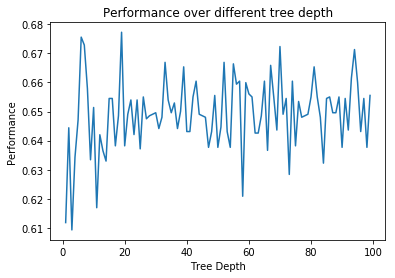

Optimized tree depth: 19.000000
Optimized Performance Score AUC: 0.677277


In [152]:
######Classification

# Optimize the decision tree depth
tree_depths = range(99)+np.ones(99)
scores = []

for  tree_depth in tree_depths:
    clf = DecisionTreeClassifier(max_depth = tree_depth)
    probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    scores.append(auc(fpr, tpr))

# Plot the figures
plt.plot(tree_depths,scores)
plt.xlabel('Tree Depth')
plt.ylabel('Performance')
plt.title('Performance over different tree depth')
plt.show()

Optimal_Depth = tree_depths[scores.index(max(scores))]
# Output the alphas for the with maximum score
print ('Optimized tree depth: %.6f' %Optimal_Depth)
print ('Optimized Performance Score AUC: %.6f' %scores[scores.index(max(scores))])




In [153]:
# Classification Tree
clf = DecisionTreeClassifier(max_depth = Optimal_Depth)
clf = clf.fit(X_train,y_train)
score = clf.score(X_test, y_test)
print(score)
clf_predict = clf.predict(X_test)
confusion_matrix(y_test,clf_predict)
filename = 'clf.pkl'
pickle.dump(clf, open(filename, 'wb'))
clf_prob = clf.predict_proba(X)

0.647727272727


Area under the ROC curve : 0.665373


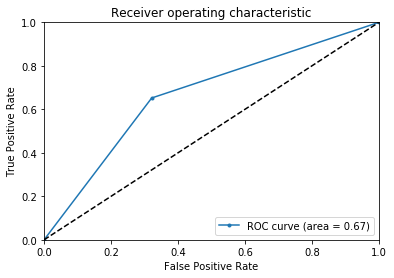

In [154]:
def generate_auc():
    classifier = DecisionTreeClassifier(max_depth = Optimal_Depth)
    clf_probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, clf_probas_[:, 1])
    clfroc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % clfroc_auc)
    return fpr, tpr, clfroc_auc, thresholds,clf_probas_

# Generate ROC  for LR 
fpr,tpr,clfroc_auc, thresholds,clf_probas_ = generate_auc()


def generate_ROCplot(fpr,tpr,label,clfroc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % clfroc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',clfroc_auc)

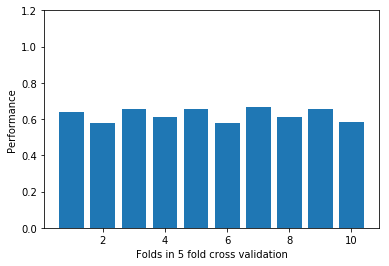

In [155]:
# Construct a kfolds object
n = 10
kf = KFold(len(y),n_folds=n,shuffle=True)

# Initialize some matrix
X_matrix = X.as_matrix()
y_matrix = y.as_matrix()
scores = []

# Iterate through folds
for train_index, test_index in kf:
    X_trainK, X_testK = X_matrix[train_index,:], X_matrix[test_index,:]
    y_trainK, y_testK = y_matrix[train_index], y_matrix[test_index] 
    classifier = DecisionTreeClassifier(max_depth = Optimal_Depth)
    #logisticRegr.fit(X_train,y_train)
    #scores.append(logisticRegr.score(X_test,y_test))
    probas_ =  classifier.fit(X_trainK, y_trainK).predict_proba(X_testK)
    fpr, tpr, thresholds = roc_curve(y_testK, probas_[:, 1])
    scores.append(auc(fpr, tpr))
    
# Plot the figure
xaxis = range(n)+ np.ones(n)  
plt.bar(xaxis,scores)
plt.xlabel('Folds in 5 fold cross validation')
plt.ylabel('Performance')
plt.ylim([0, 1.2])
plt.show()  

In [156]:
SCORE = []
SCORE.append(np.mean(scores))
SCORE[0]

0.62377298997697006

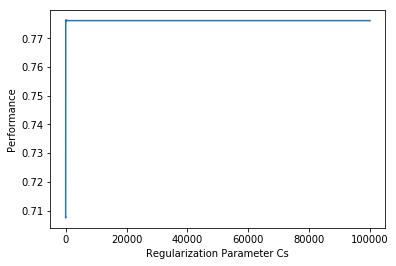

The regularization strength which optimizes performance: 99.310918
Optimized Performance Score AUC: 0.776268


In [157]:
#####Logistic Regression

# Optimize the Logistic Regression with L2 penalty (Ridge Regression)
Cs = np.logspace(-5,5,1000)
scores = []
for C in Cs:
    logisticRegr = LogisticRegression(C = C,penalty = 'l2')
    probas_ = logisticRegr.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    scores.append(auc(fpr, tpr))

# Plot the figures
plt.plot(Cs,scores)
plt.xlabel('Regularization Parameter Cs')
plt.ylabel('Performance')
plt.show()

Optim_C = Cs[scores.index(max(scores))]
# Output the Cs for the with maximum score
print ('The regularization strength which optimizes performance: %.6f' %Optim_C)
print ('Optimized Performance Score AUC: %.6f' %scores[scores.index(max(scores))])



In [158]:
# Use the optimized C value for logistic regression
lg = LogisticRegression(C = Optim_C,penalty = 'l2')
lg.fit(X_train,y_train)
score = lg.score(X_test, y_test)
lg_predict = lg.predict(X_test)
print('Optimized Performance Score : %.6f' %score)
confusion_matrix(y_test,lg_predict)
lg.coef_
lg_prob = lg.predict_proba(X)
filename = 'lg.pkl'
pickle.dump(lg, open(filename, 'wb'))

Optimized Performance Score : 0.698864


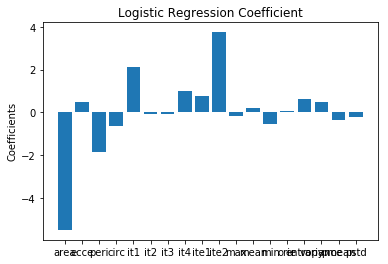

In [159]:
plt.ylabel('Coefficients')
plt.title('Logistic Regression Coefficient')
plt.xticks(range(18), FEATURE)
plt.bar(range(18),lg.coef_[0])
plt.show()

Area under the ROC curve : 0.776268


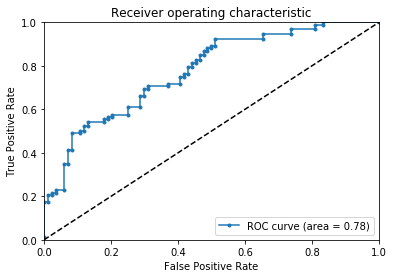

In [160]:
#Plot ROC and generate AUC to access performance
def generate_auc():
    # Choose SVC classifier.
    classifier = LogisticRegression(C = Optim_C,penalty = 'l2')
    lg_probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, lg_probas_[:, 1])
    lgroc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % lgroc_auc)
    return fpr, tpr, lgroc_auc, thresholds,lg_probas_

# Generate ROC  for LR 
fpr,tpr,lgroc_auc, thresholds,lg_probas_ = generate_auc()


def generate_ROCplot(fpr,tpr,label,lgroc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % lgroc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',lgroc_auc)

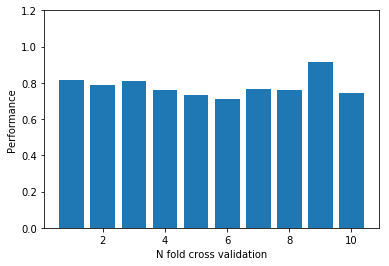

In [161]:
# Construct a kfolds object
n = 10
kf = KFold(len(y),n_folds=n,shuffle=True)

# Initialize some matrix
X_matrix = X.as_matrix()
y_matrix = y.as_matrix()
scores = []

# Iterate through folds
for train_index, test_index in kf:
    X_trainK, X_testK = X_matrix[train_index,:], X_matrix[test_index,:]
    y_trainK, y_testK = y_matrix[train_index], y_matrix[test_index] 
    classfier = LogisticRegression(C = Optim_C,penalty = 'l2')
    probas_ = classfier.fit(X_trainK, y_trainK).predict_proba(X_testK)
    fpr, tpr, thresholds = roc_curve(y_testK, probas_[:, 1])
    scores.append(auc(fpr, tpr))
    
# Plot the figur
xaxis = range(n)+ np.ones(n)  
plt.bar(xaxis,scores)
plt.xlabel('N fold cross validation')
plt.ylabel('Performance')
plt.ylim([0, 1.2])
plt.show() 

In [162]:
SCORE.append(np.mean(scores))
SCORE[1]

0.78103793903927043

In [163]:
#####KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
y_predict_probabilities = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
knnroc_auc = auc(fpr, tpr)
confusion_matrix(y_test, knn_predict)
knn_prob = knn.predict_proba(X)
filename = 'knn.pkl'
pickle.dump(knn, open(filename, 'wb'))

Area under the ROC curve : 0.735701


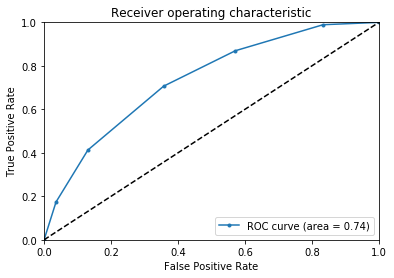

In [164]:
#Plot ROC and generate AUC to access performance
def generate_auc():
    
    # Choose SVC classifier.
    classifier = KNeighborsClassifier()
    knn_probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, knn_probas_[:, 1])
    knnroc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % knnroc_auc)
    return fpr, tpr, knnroc_auc, thresholds

# Generate ROC  for LR 
fpr,tpr,knnroc_auc, thresholds = generate_auc()


def generate_ROCplot(fpr,tpr,label,knnroc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % knnroc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',knnroc_auc)

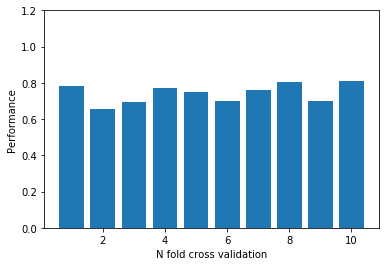

In [165]:
# Construct a kfolds object
n = 10
kf = KFold(len(y),n_folds=n,shuffle=True)

# Initialize some matrix
X_matrix = X.as_matrix()
y_matrix = y.as_matrix()
scores = []

# Iterate through folds
for train_index, test_index in kf:
    X_trainK, X_testK = X_matrix[train_index,:], X_matrix[test_index,:]
    y_trainK, y_testK = y_matrix[train_index], y_matrix[test_index] 
    classifier = KNeighborsClassifier()
    #logisticRegr.fit(X_train,y_train)
    #scores.append(logisticRegr.score(X_test,y_test))
    probas_ = classifier.fit(X_trainK, y_trainK).predict_proba(X_testK)
    fpr, tpr, thresholds = roc_curve(y_testK, probas_[:, 1])
    scores.append(auc(fpr, tpr))
    
# Plot the figure
xaxis = range(n)+ np.ones(n)  
plt.bar(xaxis,scores)
plt.xlabel('N fold cross validation')
plt.ylabel('Performance')
plt.ylim([0, 1.2])
plt.show() 

In [166]:
SCORE.append(np.mean(scores))
SCORE[2]

0.74256830098297277

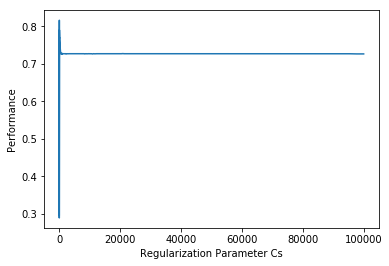

The regularization strength which optimizes performance: 18.461469
Optimized Performance Score AUC: 0.815994


In [167]:
#####SVM optimizing C
Cs = np.logspace(-5,5,1000)
scores = []
for C in Cs:
    svm = SVC(C = C,probability=True)
    probas_ = svm.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    scores.append(auc(fpr, tpr))

# Plot the figures
plt.plot(Cs,scores)
plt.xlabel('Regularization Parameter Cs')
plt.ylabel('Performance')
plt.show()

Optim_C = Cs[scores.index(max(scores))]
# Output the Cs for the with maximum score
print ('The regularization strength which optimizes performance: %.6f' %Optim_C)
print ('Optimized Performance Score AUC: %.6f' %scores[scores.index(max(scores))])


In [168]:
svm = SVC(C = Optim_C,kernel = 'rbf',probability=True)
svm.fit(X_train, y_train)
svm_predict = svm.predict(X_test)
y_predict_probabilities = svm.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
svmroc_auc = auc(fpr, tpr)
confusion_matrix(y_test, svm_predict)
filename = 'svm.pkl'
pickle.dump(svm, open(filename, 'wb'))
svm_prob = svm.predict_proba(X)

Area under the ROC curve : 0.815864


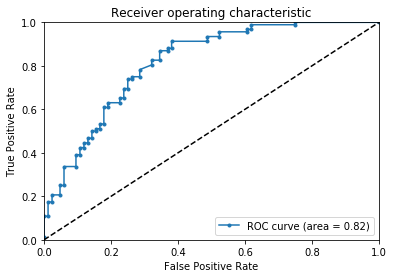

In [169]:
#Plot ROC and generate AUC to access performance
def generate_auc():

    # Choose SVC classifier.
    classifier = SVC(C = Optim_C,kernel = 'rbf',probability=True)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    svmroc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % svmroc_auc)
    return fpr, tpr, svmroc_auc, thresholds

# Generate ROC  for LR 
fpr,tpr,svmroc_auc, thresholds = generate_auc()


def generate_ROCplot(fpr,tpr,label,svmroc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % svmroc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',svmroc_auc)

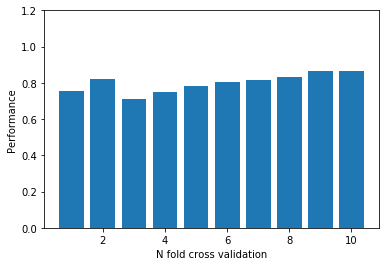

In [170]:
# Construct a kfolds object
n = 10
kf = KFold(len(y),n_folds=n,shuffle=True)

# Initialize some matrix
X_matrix = X.as_matrix()
y_matrix = y.as_matrix()
scores = []

# Iterate through folds
for train_index, test_index in kf:
    X_trainK, X_testK = X_matrix[train_index,:], X_matrix[test_index,:]
    y_trainK, y_testK = y_matrix[train_index], y_matrix[test_index] 
    classifier = SVC(C = Optim_C,kernel = 'rbf',probability=True)
    probas_ = classifier.fit(X_trainK, y_trainK).predict_proba(X_testK)
    fpr, tpr, thresholds = roc_curve(y_testK, probas_[:, 1])
    scores.append(auc(fpr, tpr))
    
# Plot the figure
xaxis = range(n)+ np.ones(n)  
plt.bar(xaxis,scores)
plt.xlabel('N fold cross validation')
plt.ylabel('Performance')
plt.ylim([0, 1.2])
plt.show() 

In [171]:
SCORE.append(np.mean(scores))
SCORE[3]

0.80033386578848908

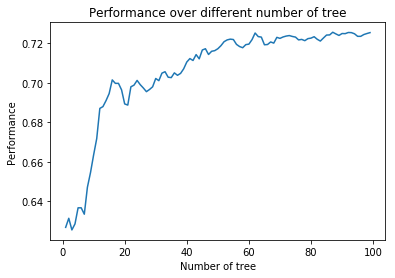

Optimized number of tree: 87.000000
Optimized Performance Score AUC: 0.725608


In [172]:
#####Random Forest Optimize # of tree
trees = np.array(range(1,100),dtype = int)
scores = []

for  tree in trees:
    rf = RandomForestClassifier(n_estimators = tree, max_depth = None,min_samples_split = 2,random_state=0)
    probas_ = rf.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    scores.append(auc(fpr, tpr))

# Plot the figures
plt.plot(trees,scores)
plt.xlabel('Number of tree')
plt.ylabel('Performance')
plt.title('Performance over different number of tree')
plt.show()
Optimal_tree = trees[scores.index(max(scores))]
# Output the alphas for the with maximum score
print ('Optimized number of tree: %.6f' %Optimal_tree)
print ('Optimized Performance Score AUC: %.6f' %scores[scores.index(max(scores))])

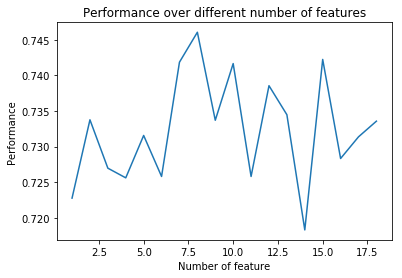

Optimized number of feature: 8.000000
Optimized Performance Score AUC: 0.746053


In [173]:
#Optimize # of features
features = np.array(range(1,19),dtype = int)
scores = []

for  feature in features:
    rf = RandomForestClassifier(n_estimators = Optimal_tree, max_features = feature, max_depth = None,\
                                min_samples_split = 2,random_state=0)
    probas_ = rf.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    scores.append(auc(fpr, tpr))

# Plot the figures
plt.plot(features,scores)
plt.xlabel('Number of feature')
plt.ylabel('Performance')
plt.title('Performance over different number of features')
plt.show()
Optimal_feature = features[scores.index(max(scores))]
# Output the alphas for the with maximum score
print ('Optimized number of feature: %.6f' %Optimal_feature)
print ('Optimized Performance Score AUC: %.6f' %scores[scores.index(max(scores))])

In [174]:
rf= RandomForestClassifier(n_estimators = Optimal_tree, max_features = Optimal_feature, max_depth = None,\
                                min_samples_split = 2,random_state=0)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
y_predict_probabilities = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
rfroc_auc = auc(fpr, tpr)
confusion_matrix(y_test, rf_predict)
rf_prob = rf.predict_proba(X)
filename = 'rf.pkl'
pickle.dump(rf, open(filename, 'wb'))
imp = rf.feature_importances_

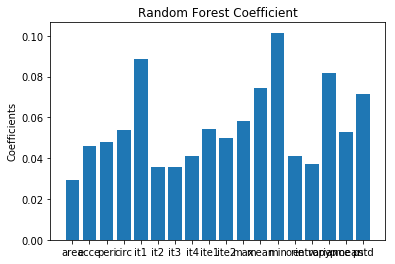

In [175]:
plt.ylabel('Coefficients')
plt.title('Random Forest Coefficient')
plt.xticks(range(18), FEATURE)
plt.bar(range(18),imp)
plt.show()

Area under the ROC curve : 0.746053


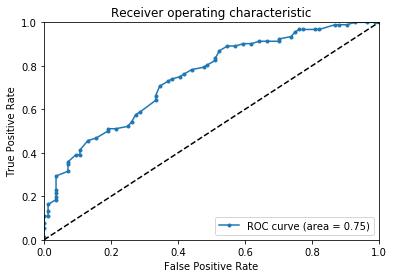

In [176]:
#Plot ROC and generate AUC to access performance
def generate_auc():
    
    # Choose SVC classifier.
    classifier = RandomForestClassifier(n_estimators = Optimal_tree, max_features = Optimal_feature, max_depth = None,\
                                min_samples_split = 2,random_state=0)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    rfroc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % rfroc_auc)
    return fpr, tpr, rfroc_auc, thresholds

# Generate ROC  for LR 
fpr,tpr,rfroc_auc, thresholds = generate_auc()


def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % rfroc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',rfroc_auc)

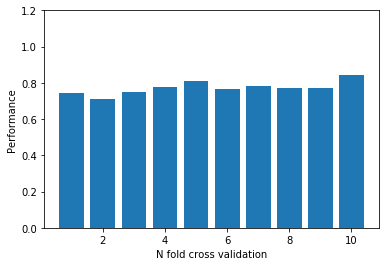

In [177]:
# Construct a kfolds object
n = 10
kf = KFold(len(y),n_folds=n,shuffle=True)

# Initialize some matrix
X_matrix = X.as_matrix()
y_matrix = y.as_matrix()
scores = []

# Iterate through folds
for train_index, test_index in kf:
    X_trainK, X_testK = X_matrix[train_index,:], X_matrix[test_index,:]
    y_trainK, y_testK = y_matrix[train_index], y_matrix[test_index] 
    classifier = RandomForestClassifier(n_estimators = Optimal_tree, max_features = Optimal_feature, max_depth = None,\
                                min_samples_split = 2,random_state=0)
    #logisticRegr.fit(X_train,y_train)
    #scores.append(logisticRegr.score(X_test,y_test))
    probas_ = classifier.fit(X_trainK, y_trainK).predict_proba(X_testK)
    fpr, tpr, thresholds = roc_curve(y_testK, probas_[:, 1])
    scores.append(auc(fpr, tpr))
    
# Plot the figure
xaxis = range(n)+ np.ones(n)  
plt.bar(xaxis,scores)
plt.xlabel('N fold cross validation')
plt.ylabel('Performance')
plt.ylim([0, 1.2])
plt.show() 

In [178]:
SCORE.append(np.mean(scores))
SCORE[4]

0.77204817422662375

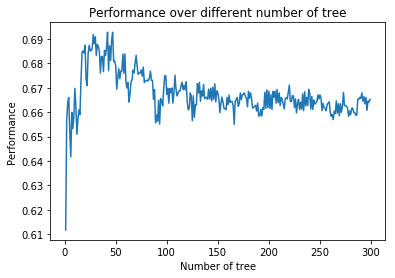

Optimized number of tree: 42.000000
Optimized Performance Score AUC: 0.692676


In [179]:
##### Adaboost classifier
trees = np.array(range(1,300),dtype = int)
scores = []

for  tree in trees:
    ada = AdaBoostClassifier(n_estimators = tree)
    probas_ = ada.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    scores.append(auc(fpr, tpr))

# Plot the figures
plt.plot(trees,scores)
plt.xlabel('Number of tree')
plt.ylabel('Performance')
plt.title('Performance over different number of tree')
plt.show()
Optimal_tree = trees[scores.index(max(scores))]
# Output the alphas for the with maximum score
print ('Optimized number of tree: %.6f' %Optimal_tree)
print ('Optimized Performance Score AUC: %.6f' %scores[scores.index(max(scores))])

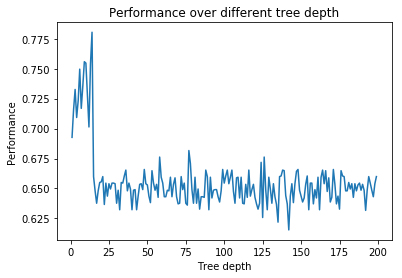

Optimized tree depth: 14.000000
Optimized Performance Score AUC: 0.780409


In [180]:
max_depths= np.array(range(1,200),dtype = int)
scores = []

for  max_depth in max_depths:
    ada= AdaBoostClassifier(DecisionTreeClassifier(max_depth = max_depth),n_estimators=Optimal_tree)
    probas_ = ada.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    scores.append(auc(fpr, tpr))

# Plot the figures
plt.plot(max_depths,scores)
plt.xlabel('Tree depth')
plt.ylabel('Performance')
plt.title('Performance over different tree depth')
plt.show()
Optimal_depth= max_depths[scores.index(max(scores))]
# Output the alphas for the with maximum score
print ('Optimized tree depth: %.6f' %Optimal_depth)
print ('Optimized Performance Score AUC: %.6f' %scores[scores.index(max(scores))])

In [181]:
ada= AdaBoostClassifier(DecisionTreeClassifier(max_depth = Optimal_depth),n_estimators=Optimal_tree)
ada.fit(X_train, y_train)
ada_predict = ada.predict(X_test)
y_predict_probabilities = ada.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
adaroc_auc = auc(fpr, tpr)
confusion_matrix(y_test, ada_predict)
ada_prob = ada.predict_proba(X)
filename = 'ada.pkl'
pickle.dump(ada, open(filename, 'wb'))

Area under the ROC curve : 0.752070


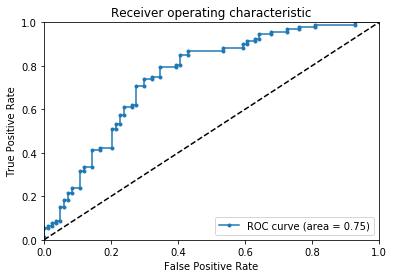

In [182]:
#Plot ROC and generate AUC to access performance
def generate_auc():
    
    # Choose SVC classifier.
    classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth = Optimal_depth),n_estimators=Optimal_tree)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    adaroc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % adaroc_auc)
    return fpr, tpr, adaroc_auc, thresholds

# Generate ROC  for LR 
fpr,tpr,adaroc_auc, thresholds = generate_auc()


def generate_ROCplot(fpr,tpr,label,adaroc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % adaroc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',adaroc_auc)

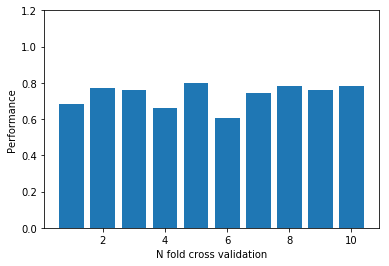

In [183]:
# Construct a kfolds object
n = 10
kf = KFold(len(y),n_folds=n,shuffle=True)

# Initialize some matrix
X_matrix = X.as_matrix()
y_matrix = y.as_matrix()
scores = []

# Iterate through folds
for train_index, test_index in kf:
    X_trainK, X_testK = X_matrix[train_index,:], X_matrix[test_index,:]
    y_trainK, y_testK = y_matrix[train_index], y_matrix[test_index] 
    classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth = Optimal_depth),n_estimators=Optimal_tree)
    #logisticRegr.fit(X_train,y_train)
    #scores.append(logisticRegr.score(X_test,y_test))
    probas_ = classifier.fit(X_trainK, y_trainK).predict_proba(X_testK)
    fpr, tpr, thresholds = roc_curve(y_testK, probas_[:, 1])
    scores.append(auc(fpr, tpr))
    
# Plot the figure
xaxis = range(n)+ np.ones(n)  
plt.bar(xaxis,scores)
plt.xlabel('N fold cross validation')
plt.ylabel('Performance')
plt.ylim([0, 1.2])
plt.show() 

In [184]:
SCORE.append(np.mean(scores))
SCORE[5]

0.73421964399277884

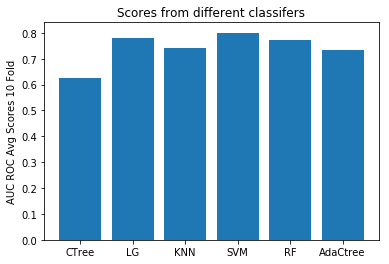

In [185]:
plt.ylabel('AUC ROC Avg Scores 10 Fold')
plt.title('Scores from different classifers')
plt.xticks(range(6), CLASSIFIER)
plt.bar(range(6),SCORE)
plt.show()

In [186]:
#Put all possibility together as X
a = clf_prob[:,[1]]
b = lg_prob[:,[1]]
c = knn_prob[:,[1]]
d = svm_prob[:,[1]]
e = rf_prob[:,[1]]
f = ada_prob[:,[1]]
X_probas = np.column_stack((a,b))
X_probas = np.column_stack((c,X_probas))
X_probas = np.column_stack((d,X_probas))
X_probas = np.column_stack((e,X_probas))
X_probas = np.column_stack((f,X_probas))
X_probas = pd.DataFrame(X_probas)
X_probas.columns = ['clf','lg','knn','svm','rf','ada']
X_probas.head()

,clf,lg,knn,svm,rf,ada
0,3.256012e-08,0.068966,0.034186,0.2,0.0,0.214783
1,9.655502e-09,0.183908,0.285307,0.2,0.0,0.443948
2,1.593271e-08,0.114943,0.183717,0.0,0.0,0.241713
3,1.722009e-08,0.080460,0.105313,0.4,0.0,0.300325
4,2.234684e-08,0.172414,0.285339,0.6,0.0,0.162839


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_probas, y, test_size=0.2)

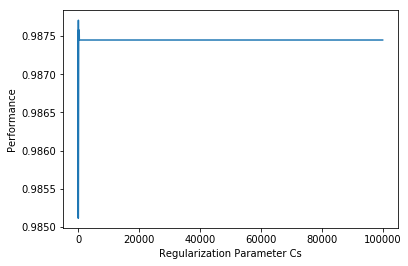

The regularization strength which optimizes performance: 3.940902
Optimized Performance Score AUC: 0.987707


In [188]:
# Optimize the Logistic Regression with L2 penalty (Ridge Regression)
Cs = np.logspace(-5,5,1000)
scores = []
for C in Cs:
    logisticRegr = LogisticRegression(C = C,penalty = 'l2')
    probas_ = logisticRegr.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    scores.append(auc(fpr, tpr))

# Plot the figures
plt.plot(Cs,scores)
plt.xlabel('Regularization Parameter Cs')
plt.ylabel('Performance')
plt.show()

Optim_C = Cs[scores.index(max(scores))]
# Output the Cs for the with maximum score
print ('The regularization strength which optimizes performance: %.6f' %Optim_C)
print ('Optimized Performance Score AUC: %.6f' %scores[scores.index(max(scores))])

In [189]:
# Use the optimized C value for logistic regression
finallg = LogisticRegression(C = Optim_C,penalty = 'l2')
finallg.fit(X_train,y_train)
score = finallg.score(X_test, y_test)
lg_predict = finallg.predict(X_test)
print('Optimized Performance Score : %.6f' %score)
confusion_matrix(y_test,lg_predict)
finallg.coef_
filename = 'finallg.pkl'
pickle.dump(finallg, open(filename, 'wb'))

Optimized Performance Score : 0.920455


Area under the ROC curve : 0.987707


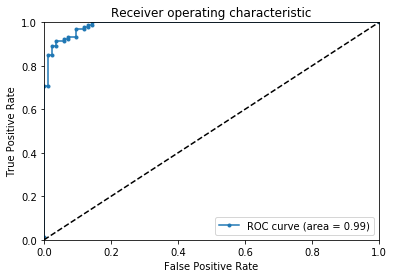

In [190]:
#Plot ROC and generate AUC to access performance
def generate_auc():
    # Choose SVC classifier.
    classifier = LogisticRegression(C = Optim_C,penalty = 'l2')
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    lgroc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % lgroc_auc)
    return fpr, tpr, lgroc_auc, thresholds

# Generate ROC  for LR 
fpr,tpr,lgroc_auc, thresholds = generate_auc()


def generate_ROCplot(fpr,tpr,label,lgroc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % lgroc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',lgroc_auc)

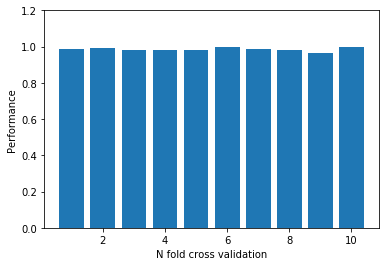

In [191]:
# Construct a kfolds object
n = 10
kf = KFold(len(y),n_folds=n,shuffle=True)

# Initialize some matrix
X_matrix = X_probas.as_matrix()
y_matrix = y.as_matrix()
scores = []

# Iterate through folds
for train_index, test_index in kf:
    X_trainK, X_testK = X_matrix[train_index,:], X_matrix[test_index,:]
    y_trainK, y_testK = y_matrix[train_index], y_matrix[test_index] 
    classfier = LogisticRegression(C = Optim_C,penalty = 'l2')
    probas_ = classfier.fit(X_trainK, y_trainK).predict_proba(X_testK)
    fpr, tpr, thresholds = roc_curve(y_testK, probas_[:, 1])
    scores.append(auc(fpr, tpr))
    
# Plot the figur
xaxis = range(n)+ np.ones(n)  
plt.bar(xaxis,scores)
plt.xlabel('N fold cross validation')
plt.ylabel('Performance')
plt.ylim([0, 1.2])
plt.show() 

In [192]:
SCORE2 = []
SCORE2.append(np.mean(scores))
SCORE2[0]

0.98563120148133143

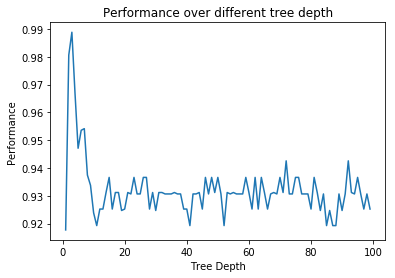

Optimized tree depth: 3.000000
Optimized Performance Score AUC: 0.988807


In [193]:
######Classification

# Optimize the decision tree depth
tree_depths = range(99)+np.ones(99)
scores = []

for  tree_depth in tree_depths:
    clf = DecisionTreeClassifier(max_depth = tree_depth)
    probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    scores.append(auc(fpr, tpr))

# Plot the figures
plt.plot(tree_depths,scores)
plt.xlabel('Tree Depth')
plt.ylabel('Performance')
plt.title('Performance over different tree depth')
plt.show()

Optimal_Depth = tree_depths[scores.index(max(scores))]
# Output the alphas for the with maximum score
print ('Optimized tree depth: %.6f' %Optimal_Depth)
print ('Optimized Performance Score AUC: %.6f' %scores[scores.index(max(scores))])

In [194]:
# Classification Tree
clf = DecisionTreeClassifier(max_depth = Optimal_Depth)
clf = clf.fit(X_train,y_train)
score = clf.score(X_test, y_test)
print(score)
clf_predict = clf.predict(X_test)
confusion_matrix(y_test,clf_predict)
filename = 'clffinal.pkl'
pickle.dump(clf, open(filename, 'wb'))

0.9375


Area under the ROC curve : 0.988807


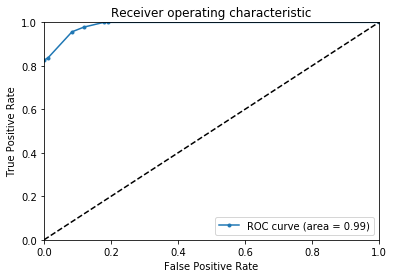

In [195]:
def generate_auc():
    classifier = DecisionTreeClassifier(max_depth = Optimal_Depth)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    clfroc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % clfroc_auc)
    return fpr, tpr, clfroc_auc, thresholds

# Generate ROC  for LR 
fpr,tpr,clfroc_auc, thresholds = generate_auc()


def generate_ROCplot(fpr,tpr,label,clroc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % clroc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',clfroc_auc)

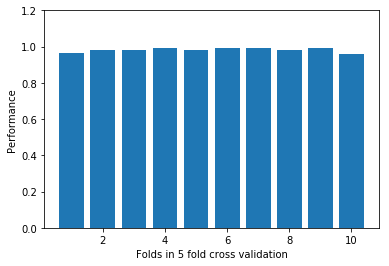

In [196]:
# Construct a kfolds object
n = 10
kf = KFold(len(y),n_folds=n,shuffle=True)

# Initialize some matrix
X_matrix = X_probas.as_matrix()
y_matrix = y.as_matrix()
scores = []

# Iterate through folds
for train_index, test_index in kf:
    X_trainK, X_testK = X_matrix[train_index,:], X_matrix[test_index,:]
    y_trainK, y_testK = y_matrix[train_index], y_matrix[test_index] 
    classifier = DecisionTreeClassifier(max_depth = Optimal_Depth)
    #logisticRegr.fit(X_train,y_train)
    #scores.append(logisticRegr.score(X_test,y_test))
    probas_ =  classifier.fit(X_trainK, y_trainK).predict_proba(X_testK)
    fpr, tpr, thresholds = roc_curve(y_testK, probas_[:, 1])
    scores.append(auc(fpr, tpr))
    
# Plot the figure
xaxis = range(n)+ np.ones(n)  
plt.bar(xaxis,scores)
plt.xlabel('Folds in 5 fold cross validation')
plt.ylabel('Performance')
plt.ylim([0, 1.2])
plt.show()

In [197]:
SCORE2.append(np.mean(scores))
SCORE2[1]

0.98302548057978978

In [198]:
#####KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
y_predict_probabilities = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
knnroc_auc = auc(fpr, tpr)
confusion_matrix(y_test, knn_predict)
filename = 'knnfinal.pkl'
pickle.dump(knn, open(filename, 'wb'))

Area under the ROC curve : 0.971467


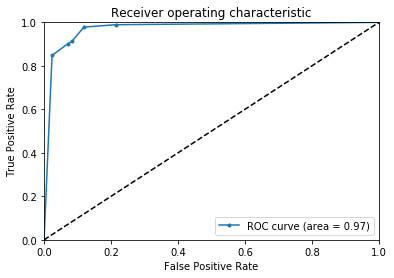

In [199]:
#Plot ROC and generate AUC to access performance
def generate_auc():
    
    # Choose SVC classifier.
    classifier = KNeighborsClassifier()
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    knnroc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % knnroc_auc)
    return fpr, tpr, knnroc_auc, thresholds

# Generate ROC  for LR 
fpr,tpr,knnroc_auc, thresholds = generate_auc()


def generate_ROCplot(fpr,tpr,label,knnroc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % knnroc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',knnroc_auc)

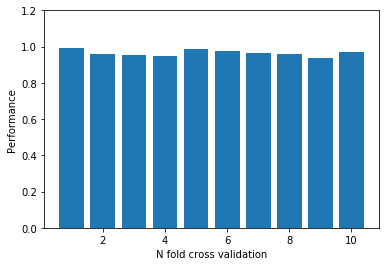

In [200]:
# Construct a kfolds object
n = 10
kf = KFold(len(y),n_folds=n,shuffle=True)

# Initialize some matrix
X_matrix = X_probas.as_matrix()
y_matrix = y.as_matrix()
scores = []

# Iterate through folds
for train_index, test_index in kf:
    X_trainK, X_testK = X_matrix[train_index,:], X_matrix[test_index,:]
    y_trainK, y_testK = y_matrix[train_index], y_matrix[test_index] 
    classifier = KNeighborsClassifier()
    #logisticRegr.fit(X_train,y_train)
    #scores.append(logisticRegr.score(X_test,y_test))
    probas_ = classifier.fit(X_trainK, y_trainK).predict_proba(X_testK)
    fpr, tpr, thresholds = roc_curve(y_testK, probas_[:, 1])
    scores.append(auc(fpr, tpr))
    
# Plot the figure
xaxis = range(n)+ np.ones(n)  
plt.bar(xaxis,scores)
plt.xlabel('N fold cross validation')
plt.ylabel('Performance')
plt.ylim([0, 1.2])
plt.show() 

In [201]:
SCORE2.append(np.mean(scores))
SCORE2[2]

0.96513980959799583

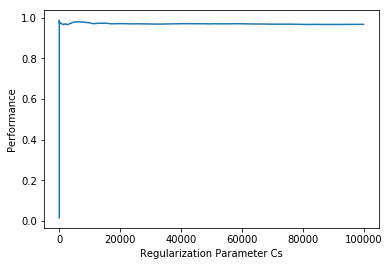

The regularization strength which optimizes performance: 0.040142
Optimized Performance Score AUC: 0.987060


In [202]:
#####SVM optimizing C
Cs = np.logspace(-5,5,1000)
scores = []
for C in Cs:
    svm = SVC(C = C,probability=True)
    probas_ = svm.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    scores.append(auc(fpr, tpr))

# Plot the figures
plt.plot(Cs,scores)
plt.xlabel('Regularization Parameter Cs')
plt.ylabel('Performance')
plt.show()

Optim_C = Cs[scores.index(max(scores))]
# Output the Cs for the with maximum score
print ('The regularization strength which optimizes performance: %.6f' %Optim_C)
print ('Optimized Performance Score AUC: %.6f' %scores[scores.index(max(scores))])

In [203]:
svm = SVC(C = Optim_C,kernel = 'rbf',probability=True)
svm.fit(X_train, y_train)
svm_predict = svm.predict(X_test)
y_predict_probabilities = svm.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
svmroc_auc = auc(fpr, tpr)
filename = 'svmfinal.pkl'
pickle.dump(svm, open(filename, 'wb'))
confusion_matrix(y_test, svm_predict)

array([[73, 11],
       [ 5, 87]], dtype=int64)

Area under the ROC curve : 0.987060


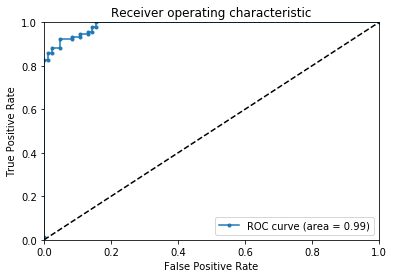

In [204]:
#Plot ROC and generate AUC to access performance
def generate_auc():

    # Choose SVC classifier.
    classifier = SVC(C = Optim_C,kernel = 'rbf',probability=True)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    svmroc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % svmroc_auc)
    return fpr, tpr, svmroc_auc, thresholds

# Generate ROC  for LR 
fpr,tpr,svmroc_auc, thresholds = generate_auc()


def generate_ROCplot(fpr,tpr,label,svmroc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % svmroc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',svmroc_auc)

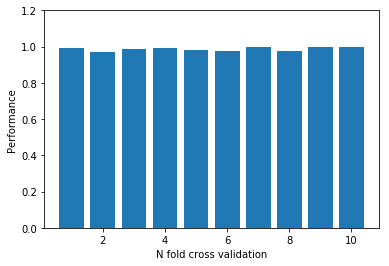

In [205]:
# Construct a kfolds object
n = 10
kf = KFold(len(y),n_folds=n,shuffle=True)

# Initialize some matrix
X_matrix = X_probas.as_matrix()
y_matrix = y.as_matrix()
scores = []

# Iterate through folds
for train_index, test_index in kf:
    X_trainK, X_testK = X_matrix[train_index,:], X_matrix[test_index,:]
    y_trainK, y_testK = y_matrix[train_index], y_matrix[test_index] 
    classifier = SVC(C = Optim_C,kernel = 'rbf',probability=True)
    probas_ = classifier.fit(X_trainK, y_trainK).predict_proba(X_testK)
    fpr, tpr, thresholds = roc_curve(y_testK, probas_[:, 1])
    scores.append(auc(fpr, tpr))
    
# Plot the figure
xaxis = range(n)+ np.ones(n)  
plt.bar(xaxis,scores)
plt.xlabel('N fold cross validation')
plt.ylabel('Performance')
plt.ylim([0, 1.2])
plt.show() 

In [206]:
SCORE2.append(np.mean(scores))
SCORE2[3]

0.9860164951511361

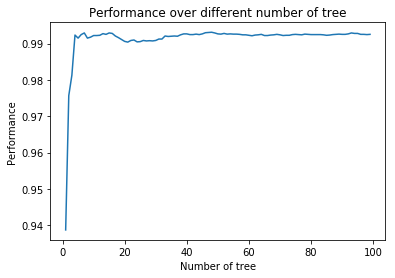

Optimized number of tree: 48.000000
Optimized Performance Score AUC: 0.993142


In [207]:
#####Random Forest Optimize # of tree
trees = np.array(range(1,100),dtype = int)
scores = []

for  tree in trees:
    rf = RandomForestClassifier(n_estimators = tree, max_depth = None,min_samples_split = 2,random_state=0)
    probas_ = rf.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    scores.append(auc(fpr, tpr))

# Plot the figures
plt.plot(trees,scores)
plt.xlabel('Number of tree')
plt.ylabel('Performance')
plt.title('Performance over different number of tree')
plt.show()
Optimal_tree = trees[scores.index(max(scores))]
# Output the alphas for the with maximum score
print ('Optimized number of tree: %.6f' %Optimal_tree)
print ('Optimized Performance Score AUC: %.6f' %scores[scores.index(max(scores))])

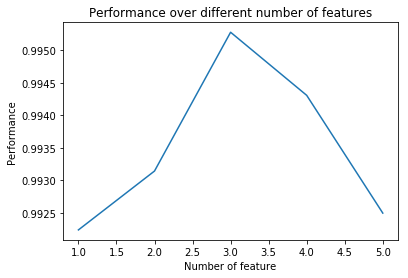

Optimized number of feature: 3.000000
Optimized Performance Score AUC: 0.995277


In [208]:
#Optimize # of features
features = np.array(range(1,6),dtype = int)
scores = []

for  feature in features:
    rf = RandomForestClassifier(n_estimators = Optimal_tree, max_features = feature, max_depth = None,\
                                min_samples_split = 2,random_state=0)
    probas_ = rf.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    scores.append(auc(fpr, tpr))

# Plot the figures
plt.plot(features,scores)
plt.xlabel('Number of feature')
plt.ylabel('Performance')
plt.title('Performance over different number of features')
plt.show()
Optimal_feature = features[scores.index(max(scores))]
# Output the alphas for the with maximum score
print ('Optimized number of feature: %.6f' %Optimal_feature)
print ('Optimized Performance Score AUC: %.6f' %scores[scores.index(max(scores))])

In [209]:
rf= RandomForestClassifier(n_estimators = Optimal_tree, max_features = Optimal_feature, max_depth = None,\
                                min_samples_split = 2,random_state=0)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
y_predict_probabilities = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
rfroc_auc = auc(fpr, tpr)
confusion_matrix(y_test, rf_predict)
imp = rf.feature_importances_
filename = 'rffinal.pkl'
pickle.dump(rf, open(filename, 'wb'))

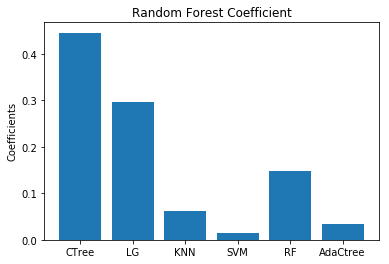

In [210]:
plt.ylabel('Coefficients')
plt.title('Random Forest Coefficient')
plt.xticks(range(6),CLASSIFIER)
plt.bar(range(6),imp)
plt.show()

Area under the ROC curve : 0.995277


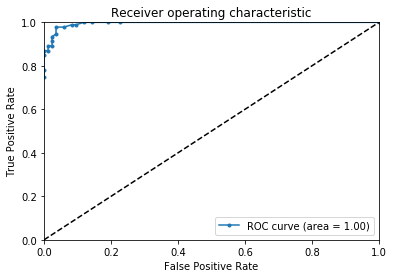

In [211]:
#Plot ROC and generate AUC to access performance
def generate_auc():
    
    # Choose SVC classifier.
    classifier = RandomForestClassifier(n_estimators = Optimal_tree, max_features = Optimal_feature, max_depth = None,\
                                min_samples_split = 2,random_state=0)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    rfroc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % rfroc_auc)
    return fpr, tpr, rfroc_auc, thresholds

# Generate ROC  for LR 
fpr,tpr,rfroc_auc, thresholds = generate_auc()


def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % rfroc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',rfroc_auc)

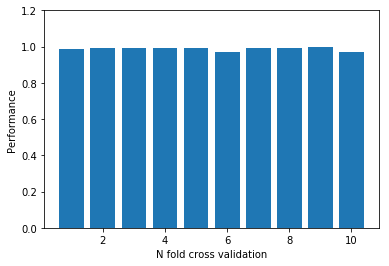

In [212]:
# Construct a kfolds object
n = 10
kf = KFold(len(y),n_folds=n,shuffle=True)

# Initialize some matrix
X_matrix = X_probas.as_matrix()
y_matrix = y.as_matrix()
scores = []

# Iterate through folds
for train_index, test_index in kf:
    X_trainK, X_testK = X_matrix[train_index,:], X_matrix[test_index,:]
    y_trainK, y_testK = y_matrix[train_index], y_matrix[test_index] 
    classifier = RandomForestClassifier(n_estimators = Optimal_tree, max_features = Optimal_feature, max_depth = None,\
                                min_samples_split = 2,random_state=0)
    #logisticRegr.fit(X_train,y_train)
    #scores.append(logisticRegr.score(X_test,y_test))
    probas_ = classifier.fit(X_trainK, y_trainK).predict_proba(X_testK)
    fpr, tpr, thresholds = roc_curve(y_testK, probas_[:, 1])
    scores.append(auc(fpr, tpr))
    
# Plot the figure
xaxis = range(n)+ np.ones(n)  
plt.bar(xaxis,scores)
plt.xlabel('N fold cross validation')
plt.ylabel('Performance')
plt.ylim([0, 1.2])
plt.show() 

In [213]:
SCORE2.append(np.mean(scores))
SCORE2[4]

0.98791755528299008

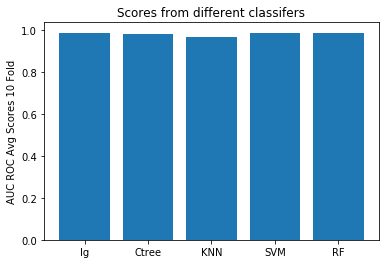

In [214]:
plt.ylabel('AUC ROC Avg Scores 10 Fold')
plt.title('Scores from different classifers')
CLASSIFIER2 = ['lg','Ctree','KNN','SVM','RF']
plt.xticks(range(5), CLASSIFIER2)
plt.bar(range(5),SCORE2)
plt.show()

In [215]:
SCORE2

[0.98563120148133143,
 0.98302548057978978,
 0.96513980959799583,
 0.9860164951511361,
 0.98791755528299008]

In [216]:
pre = rf.predict(X_probas)

In [217]:
confusion_matrix(y, pre)

array([[424,   7],
       [  1, 445]], dtype=int64)